# IBM cloud deployment

Team ID - PNT2022TMID19491

# Importing the required libraries

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 45 kB/s s eta 0:00:012
     |████████████████████████████████| 14.1 MB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 74.1 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 77.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 79.5 MB/s eta 0:00:01
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found exi

In [4]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #convolutional Layer
from keras.utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [7]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [8]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

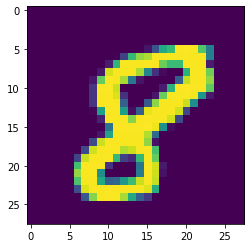

In [11]:
plt.imshow(x_train[6957])     #ploting the index=image

In [12]:
np.argmax(y_train[6957])

0

# Reshaping Dataset

In [13]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [14]:
number_of_classes = 10  #storing the no of classes in a variable

In [15]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [19]:
#create model
model=Sequential ()

In [20]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [21]:
#flatten the dimension of the image
model.add(Flatten())

In [22]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [23]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [24]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [25]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2423 - accuracy: 0.9518 - val_loss: 0.0800 - val_accuracy: 0.9749
Epoch 2/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0661 - accuracy: 0.9794 - val_loss: 0.0791 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0941 - val_accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0970 - val_accuracy: 0.9777


# Observing the metrics

In [26]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.0969829186797142, 0.9776999950408936]


# Test The Model

In [31]:
prediction=model.predict(x_test[6958:6959])
print(prediction)

1/1 [==============================] - 0s 22ms/step
[[4.0213219e-12 3.5353849e-13 1.0071677e-13 2.5342949e-13 7.9304723e-12
  8.0190281e-12 6.3504362e-20 7.9635621e-12 1.0000000e+00 3.3254654e-13]]


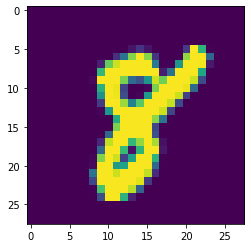

In [32]:
plt.imshow(x_test[6958])

In [33]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[8]


In [35]:
np.argmax(y_test[6958:6959]) #printing the actual labels

8

# Save The model

In [71]:
pwd

'/home/wsuser/work'

In [68]:
# Save the model
model.save('models/trainedModel.h5')

In [113]:
cd models


/home/wsuser/work/models


In [105]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz trainedModel.h5

trainedModel.h5


In [88]:
!pip install watson-machine-learning-client --upgrade

# Cloud deploy

In [93]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"pHEwrPozNcR-L1iy5TPgQWePSCPk7EcdR-dE0vlzve1R"
}
client = APIClient(credentials)
client

In [94]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/13a67f3da8ce47919951df22377d6072:e41a2c17-6365-48c7-9aad-7900251147ba::',
      'guid': 'e41a2c17-6365-48c7-9aad-7900251147ba',
      'name': 'Watson Machine Learning-zw',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'models',
    'scope': {'bss_account_id': '13a67f3da8ce47919951df22377d6072'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '085f21d8-3c76-443d-bf36-98db4a47034d',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'f8b976eb7d6e4d9cb51958b2013572b5',
        'api_key': 'K15kMBOBIxW7fvnpp2XmlLYKg8u1qqIpz_zgOGV3KV1o',
        'secret_access_key': '872e2b8ef8636503cc7fbccedc03944bae06ed3c530d81c9',
        'service_id': 'ServiceId-daecd1c8-c197-4144-8cea-44262af8f740'},
       'editor': {'access_key_id': 'fd45821b532e4b52ba371a83332e3a0f',
        'api_key': '4a

In [97]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [98]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 174c9535-90c1-4d38-b3d7-f15cdbf13e67


In [99]:
client.set.default_space(space_uid)

'SUCCESS'

In [100]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [101]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [102]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Handwritten Digit Recognition CNN Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [103]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-06T14:11:12.329Z',
  'id': '1822f4ee-3b96-45ba-81df-9921a2c34e96',
  'modified_at': '2022-11-06T14:11:16.187Z',
  'name': 'Handwritten Digit Recognition CNN Model',
  'owner': 'IBMid-663003Y61A',
  'resource_key': 'eb0f0ae1-7c6a-49e2-abf1-8b3ad97b11d1',
  'space_id': '174c9535-90c1-4d38-b3d7-f15cdbf13e67'},
 'system': {'warnings': []}}

In [104]:
model_id = client.repository.get_model_id(model_details)
model_id

'1822f4ee-3b96-45ba-81df-9921a2c34e96'

In [108]:
client.repository.download(model_id,'IBM_Digit_Recognizer_model.tar.gz')

Successfully saved model content to file: 'IBM_Digit_Recognizer_model.tar.gz'


'/home/wsuser/work/models/IBM_Digit_Recognizer_model.tar.gz'

In [111]:
ls

handwritten-digit-recognition-model_new.tgz  trainedModel.h5
IBM_Digit_Recognizer_model.tar.gz


# TEST MODEL

In [114]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [115]:
model = load_model("trainedModel.h5")

In [116]:
model

In [127]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xglVQkzEf5qe6v6VWbdq9KCLfz7-8qScQQe9t9umoy8W',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'anovelmethodforhandwrittendigitre-donotdelete-pr-waapzywq80yk7w'
object_key = 'mnist-dataset-1024x424 (5).png'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [128]:
img = Image.open(streaming_body_2).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [129]:
img

In [130]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [133]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.0139505e-09 7.3190647e-14 5.1109399e-12 9.9999976e-01 9.6466547e-18
  2.6833868e-07 2.4949229e-13 3.3784953e-14 2.4141853e-09 2.5182673e-10]]


In [132]:
print(np.argmax(pred, axis=1)) #printing our Labels

[3]
